<div align="right">Revision 1 : October 2022</div>

<a href="https://colab.research.google.com/github/dewdotninja/robotics/blob/master/EMMErobo22_IUP/emmerobo22_IUP_hw5_oop_soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left">
<img src="https://raw.githubusercontent.com/dewdotninja/exams/main/feng_heading_en.png" width=400 alt="Feng heading"/>
</p>

#### Department of Mechanical Engineering

First Semester, Academic Year 2022

<br>**01211433  Vision and Control of Industrial Robots (International Undergraduate Program)**

### Homework 5 : discrete cascaded PID controllers implementation

#### Object-oriented approach solution

(10 points) Simulate step response the cascaded PID feedback in Homework 4 and compare with the continuous-time result.
They should match well.

Type student name - surname and ID in the cell below.

In [ ]:
#Avg Poipet 6010506258

#### Homework problems may depend on the last 3 digits of your student ID

-------xyz (other digits are ignored)

In case any digit in the last 3 are 0, it must be replaced by 5.

#### Examples
    
Student A's ID - 6010555853 results in x = 8, y = 5, z = 3

Student B 's ID - 6010546104 results in x = 1, y = 5, z = 4

Student C 's ID - 6310055032 results in x = 5, y = 3, z = 2
    
These valuess are used for all the problems in the exam where x,y,and/or z appear. In this 
sense, the results from each student should be different even computed using the same methods.

Operations that may be applied to the variables.

$+$ addition

 $-$  subtraction

 $*$  multiplication 

 $/$ division

$**$ raise to the power (For example, x**z means $x^z$)

including math opertions such as $\exp(x)$, $\sin(z*t)$

If a variable is embedded in some digit of a value without any operation symbol, 
just replace that digit. 
<br>For example,  z=8 y = 3 $\Rightarrow$ 12z7 = 1287, 4.3y5 = 4.335

Conditional statement may be used, such as
if x<5 do task A, otherwise do task B

<em>Example: </em> Let $R1 = 1000*x \,\Omega, C1 = 10*y \,\mu F$

<ul>
<li />Student A (x=8, y=5) does this problem with R1 = 8000 $\Omega$, C1 = 50 $\mu$F
<li />Student B (x=1, y=5) does this problem with R1 = 1000 $\Omega$, C1 = 50 $\mu$F
<li />Student C (x=5, y=3) does this problem with R1 = 5000 $\Omega$, C1 = 30 $\mu$F
</ul>


In [ ]:
# You need to install these libraries in the Colab environment
#!pip install control

In [1]:
# import libraries you want to use
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

### (from previous homeworks)

One device commonly used in industrial machines with rotary motion, such as robotic joints, is called a Harmonic Drive from a group of companies Harmonic Drive LLC. motor Hereafter, for the convenience of writing, it is abbreviated as the HDM system.

Figure 1 shows the structure of the HDM mechanism consisting of three parts: a circular spline, a flexspline, and an elliptical wave generator. The wave generator is connected to the shaft of a motor that rotates at high speed. A round ring has teeth inside. Between the two are separated by an elastic ring with teeth on the outside.

<p align="center">
<img src="https://drive.google.com/uc?id=1PtcGtTJ2iv81nLHz5Gb5mNnGeM_d5i4c" width=300 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 HDM structure (https://www.harmonicdrive.net/)</b></div>

When drawing a schematic diagram of the HDM device connected to the DC motor, it will be shown in Figure 2. Left side is the motor's electrical system. and on the right is the mechanical system of the harmonic drive, represented by a soft shaft thru-axle gearbox with a hardness of k.

<p align="center">
<img src="https://drive.google.com/uc?id=1OP3LsMAgsHQ5uYdmVLQFHQLq55J-kYd7" width=550 alt="Figure 2"/>
</p>
<div align="center"><b>Figure 2 HDM block diagram </b></div>

Define
$$
p_l(s) = J_ls^2 + B_ls + k \tag{1}
$$
$$
p_m(s) = J_ms^2 + B_ms + k \tag{2}
$$
Overall transfer function of HDM can be described as 
$$
P(s) = \frac{\theta_l(s)}{V(s)} = \frac{k_mk}{p_m(s)p_l(s)(Ls+R)-k^2(Ls+R)+rk_mk_bsp_l(s)} \tag{3}
$$
assign parameter values (with x, y, z from your student ID)

<code>
	km = (y+z)*100  # torque constant
	kb = 1  # back EMF constant
	k = 1000 # torsional stiffness of harmonic drive
	r = x   # gear ratio
	R = 1  # armature resistance
	L = 0.1 # armature inductance
	Jm = (x+y)  #  motor inertia
	Bm = 0.01*y  # motor shaft friction
	Jl = (x+z)  # load inertia
	Bl = 0.01*z  # load friction
</code>

Write code to create a plant transfer function of HDM as in (3) 

#### Copy your solution from HW2


In [2]:
#Change student ID variables to match your ID.
id_x = 2
id_y = 5
id_z = 8

In [3]:
km = (id_y+id_z)*100  # torque constant
kb = 1  # back EMF constant
k = 1000 # torsional stiffness of harmonic drive
r = id_x   # gear ratio
R = 1  # armature resistance
L = 0.1 # armature inductance
Jm = (id_x+id_y)  #  motor inertia
Bm = 0.01*id_y  # motor shaft friction
Jl = (id_x+id_z)  # load inertia
Bl = 0.01*id_z  # load friction	
s = ctl.tf("s")
p_l = Jl*s**2 + Bl*s + k
p_m = Jm*s**2 + Bm*s + k
P = km*k/(p_m*p_l*(L*s+R) - (k**2)*(L*s+R) + r*km*kb*s*p_l)
P

TransferFunction(array([1300000]), array([7.00000000e+00, 7.01060000e+01, 2.77010604e+04, 1.72210040e+04,
       2.60013000e+06, 0.00000000e+00]))

#### Result from homework 4

Figure 3 shows cascaded PID structure (for a robot joint driven by simple 
DC motor) to improve closed-loop performance.  

<p align="center">
<img src="https://drive.google.com/uc?id=1uUQjWyLEXP1XmwUTk5KpU6Tcr84k61G7" width=550 alt="Figure 4"/>
</p>
<div align="center"><b>Figure 3 cascaded PID control</b></div>

Extract the integrator from the HDM plant in HW2 (in above cell) to use it in the outer loop 
as shown in Figure 3. The rest of the plant transfer function is in the inner-loop. For both 
loops, use the following PID equation 

$$
C(s) = K_p + \frac{K_i}{s} + \frac{NK_d}{N/s+1}
$$

***

**P1** (10 points)

Implement the discrete cascaded PID controllers from HW4. Some of the code such as plant simulation is 
provided for you. Just fill in the missing code.

#### Solution

Create a PID function to be used in simulation.

In [4]:
def PID(kp, ki,kd,N):
    s = ctl.tf("s")
    C = kp + ki/s + kd*s*N/(s+N)
    return C

Consider the HDM plant from P1. Factorize it as 
$$
P(s) = P_{inner}(s)\frac{1}{s}
$$
So can find $P_{inner}(s)$ from
$$
P_{inner}(s) = sP(s)
$$

In [5]:
P_inner = ctl.minreal(s*P)
P_inner

1 states have been removed from the model


TransferFunction(array([185714.28571429]), array([1.00000000e+00, 1.00151429e+01, 3.95729434e+03, 2.46014343e+03,
       3.71447143e+05]))

Construct cascaded PID to simulate the response. Use PID parameters achieved from Homework 4. 
(If you are 
unsuccessful with that homework, simply  use a set of parameters that yields closed-loop stability and decent 
step response.)

In [6]:
Kp1 = 2.3
Ki1 = 0.8
Kd1 = 0.6
N1 = 20
Kp2 = 1.6
Ki2 = 1.3
Kd2 = 0.1
N2 = 20

0 states have been removed from the model


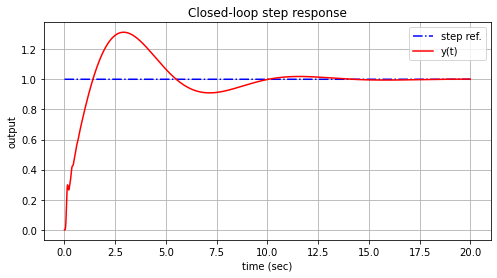

In [7]:
C_pid_inner = PID(Kp1,Ki1,Kd1,N1)
L_inner = C_pid_inner*P_inner
T_inner = ctl.feedback(L_inner)
C_pid_outer = PID(Kp2,Ki2,Kd2,N2)
P_outer = 1/s
L_outer = C_pid_outer*T_inner*P_outer
T_outer = ctl.minreal(ctl.feedback(L_outer))
tvec = np.arange(0,20,0.001)
tv, y = ctl.step_response(T_outer,tvec)
r = np.ones(tv.shape)
plt.figure(figsize=(8,4))
plt.plot(tv,r,'b-.',tv,y,'r-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('output')
plt.legend(['step ref.','y(t)'])
plt.title('Closed-loop step response')
plt.show()

Use PID class from https://github.com/dewdotninja/control_python/blob/main/adv_pid_class_implement.ipynb.

**Note :** The code is for full-featured PID. So we must modify it to conform to this homework.


In [8]:
# PID controller class
class PID:
    def __init__(self,kp,ki,kd,n,ts):
        # PID parameters
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.n = n
        self.ts = ts
        
        # controller states
        self.e1 = 0
        self.e0 = 0
        self.up0 = 0
        self.ui1 = 0
        self.ui0 = 0
        self.ud1 = 0
        self.ud0 = 0
        self.cd0 = 0  # coefficients for derivative output
        self.cd1 = 0
        self.update()
        
    # parameter getters & setters 
    def getkp(self):
        return self.kp
    def getki(self):
        return self.ki
    def getkd(self):
        return self.kd
    def getn(self):
        return self.n
    def getts(self):
        return self.ts
    def getparms(self):
        parms = np.array([self.kp,self.ki,self.kd,self.n,self.ts])
        return parms

    def setkp(self,kp):
        self.kp = kp
    def setki(self,ki):
        self.ki = ki
    def setkd(self,kd):
        self.kd = kd
    def setn(self,n):
        self.n = n
    def setts(self,ts):
        self.ts = ts
    def setparms(self,parms):
        self.kp = parms[0]
        self.ki = parms[1]
        self.kd = parms[2]
        self.n = parms[4]
        self.ts = parms[7]

    def update(self): # coefficient update
        self.cd0 = -(self.n*self.ts -2)/(2+self.n*self.ts)
        self.cd1 = 2*self.kd*self.n/(2+self.n*self.ts)
        
    # reset controller states
    def reset(self):
        self.e1 = 0
        self.e0 = 0
        self.up0 = 0
        self.ui1 = 0
        self.ui0 = 0
        self.ud1 = 0
        self.ud0 = 0
        self.u = 0

    def out(self,r,y):
        # state transfer
        self.e1 = self.e0
        
        self.ui1 = self.ui0
        self.ud1 = self.ud0
        # compute errors for each term
        self.e0 = r - y
        
        self.up0 = self.kp*self.e0 # output of P term
        self.ui0 = self.ui1 +0.5*self.ki*self.ts*(self.e0+self.e1) # output of I term
        self.ud0 = self.cd0*self.ud1 +self.cd1*(self.e0 - self.e1) # output of D term
        self.u = self.up0 + self.ui0 + self.ud0        
        return self.u

In [9]:
Ts = 0.001 # sampling period

In [10]:
# create PID instances for inner and outer loops
pid_inner = PID(Kp1,Ki1,Kd1,N1,Ts)
pid_outer = PID(Kp2,Ki2,Kd2,N2,Ts)

For plant simulation, we define the class as in https://github.com/dewdotninja/control_python/blob/main/discrete_implement_oop.ipynb

In [11]:
class DF2:
    def __init__(self,num,den,ts):
        self.num = num
        self.den = den
        self.ts = ts  # keep sampling time for reference only.
        self.order = len(self.den)
        self.states = np.zeros((self.order,1))
        self.y = 0.0
        
    def state_update(self): # update state vectors
        for k in range(self.order-1):
            self.states[self.order-k-1] = self.states[self.order-k-2]
    
    def reset(self):
        for k in range(self.order-1):
            self.states[k] = 0.0
    
    def out(self, u): # compute output
        self.states[0] = u
        y = self.num[0]*u
        for k in range(self.order-1):
            self.states[0] = self.states[0] -self.den[k+1]*self.states[k+1]
            y = y + (self.num[k+1] - self.num[0]*self.den[k+1])*self.states[k+1]   
        return y
        

Extract the numerator and denominator coefficients from the plant transfer functions.

In [12]:
Pd_inner = ctl.sample_system(P_inner, Ts, method='tustin')
Pdnum_inner, Pdden_inner = ctl.tfdata(Pd_inner)
pnum_inner = np.squeeze(np.array(Pdnum_inner))
pden_inner = np.squeeze(np.array(Pdden_inner))

In [13]:
Pd_outer = ctl.sample_system(P_outer, Ts, method='tustin')
Pdnum_outer, Pdden_outer = ctl.tfdata(Pd_outer)
pnum_outer = np.squeeze(np.array(Pdnum_outer))
pden_outer = np.squeeze(np.array(Pdden_outer))

Create plant instances.

In [14]:
p_inner = DF2(pnum_inner,pden_inner,Ts)
p_outer = DF2(pnum_outer,pden_outer,Ts)

In [15]:
tvec = np.arange(0,20,Ts)
tv, yc = ctl.step_response(T_outer,tvec) # used for comparison
rvec = np.ones(tvec.shape)
yvec = np.zeros(tvec.shape)

Note that the code for simulation is much simpler when OOP approach is used.


In [16]:
i=0

pid_inner.reset()
pid_outer.reset()
p_inner.reset()
p_outer.reset()

co_inner = 0
co_outer = 0
po_inner = 0
po_outer = 0
for i in range(len(tvec)):
    # state updates
    p_inner.state_update()
    p_outer.state_update()
        
    co_outer = pid_outer.out(rvec[i],po_outer)    
    co_inner = pid_inner.out(co_outer,po_inner)    
    po_inner = p_inner.out(co_inner)
    po_outer = p_outer.out(po_inner)

    yvec[i] = po_outer

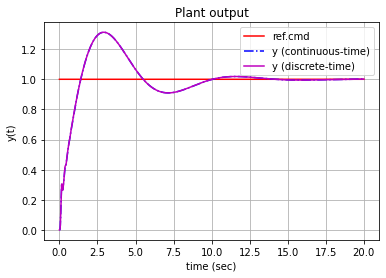

In [17]:
plt.figure()
plt.plot(tvec,rvec,'r-',tvec, yc,'b-.',tvec,yvec,'m-')
plt.grid('True')
plt.xlabel('time (sec)')
plt.ylabel('y(t)')
plt.legend(['ref.cmd','y (continuous-time)','y (discrete-time)'])
plt.title("Plant output")
plt.show()